Importing data from the following files:
*   `PS2_Data.txt`
*   `Monthly_Predict.txt`
*   `Daily_Predict.txt`

In [ ]:
data_file=open('PS2_Data.txt','r')
raw_data=data_file.readlines()
data_file.close()
datefreq={}
for line in raw_data:
    parts=line.split(' ')
    datefreq[parts[0]]=int(parts[1])
month_predict_file=open('Monthly_Predict.txt','r')
raw_month_predict=month_predict_file.readlines()
month_predict_file.close()
month_predict=[float(line) for line in raw_month_predict]
predict_file=open('Daily_Predict.txt','r')
raw_predict=predict_file.readlines()
predict_file.close()
predict=[float(line) for line in raw_predict]

The monthly prediction:

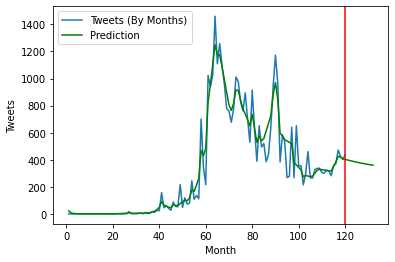

In [ ]:
import matplotlib.pyplot as plt
months=[]
for y in ('2013','2014','2015','2016','2017','2018','2019','2020','2021','2022'):
    for m in ('01','02','03','04','05','06','07','08','09','10','11','12'):months.append(y+'-'+m)
x=list(range(1,121))
corr={}
y=[0]*120
for i in range(120):corr[months[i]]=i
for key in datefreq.keys():y[corr[key[:7]]]+=datefreq[key]
plt.plot(x,y,label='Tweets (By Months)')
xpm=list(range(1,133))
ypm=month_predict
plt.plot(xpm,ypm,label='Prediction',color='green')
plt.xlabel('Month')
plt.ylabel('Tweets')
plt.axvline(120,color='red')
plt.legend()
plt.show()

The daily prediction:

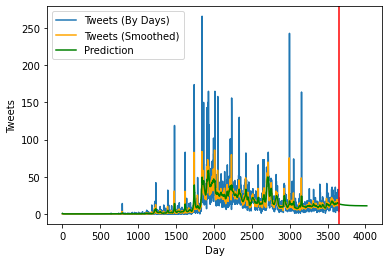

In [ ]:
yrs=('2013','2014','2015','2016','2017','2018','2019','2020','2021','2022')
mos=('01','02','03','04','05','06','07','08','09','10','11','12')
days=('01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28')
alldates={}
day=[]
for yr in yrs:
    for mo in mos:
        for da in days:day.append(yr+'-'+mo+'-'+da)
        if mo=='02':
            if not int(yr)%4:day.append(yr+'-'+mo+'-29')
        else:
            day.append(yr+'-'+mo+'-29')
            day.append(yr+'-'+mo+'-30')
            if mo in ('01','03','05','07','08','10','12'):day.append(yr+'-'+mo+'-31')
x0=list(range(1,1+len(day)))
y0=[0]*len(day)
for i in range(len(day)):alldates[day[i]]=i
for key in datefreq.keys():y0[alldates[key[:10]]]+=datefreq[key]
plt.plot(x0,y0,label='Tweets (By Days)')
plt.xlabel('Day')
plt.ylabel('Tweets')
for i in range(3,len(y0)-3):y0[i]=sum(y0[i-3:i+4])/7
y0=y0[3:-3]
x0=list(range(1,1+len(y0)))
plt.plot(x0,y0,color='orange',label='Tweets (Smoothed)')
xp=list(range(1,366+len(day)))
yp=predict
plt.plot(xp,yp,label='Prediction',color='green')
plt.xlabel('Day')
plt.ylabel('Tweets')
plt.axvline(len(day),color='red')
plt.legend()
plt.show()